In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.ioff()
# turn of warnings
import warnings
warnings.filterwarnings('ignore')


# Creating an Ensemble of Fields

Creating an ensemble of random fields would also be
a great idea. Let's reuse most of the previous code.

We will set the position tuple `pos` before generation to reuse it afterwards.


In [2]:
import numpy as np
import gstools as gs

x = y = np.arange(100)

model = gs.Gaussian(dim=2, var=1, len_scale=10)
srf = gs.SRF(model)
srf.set_pos([x, y], "structured")

This time, we did not provide a seed to `SRF`, as the seeds will used
during the actual computation of the fields. We will create four ensemble
members, for better visualisation, save them in to srf class and in a first
step, we will be using the loop counter as the seeds.



In [3]:
ens_no = 4
for i in range(ens_no):
    srf(seed=i, store=f"field{i}")

Now let's have a look at the results. We can access the fields by name or
index:



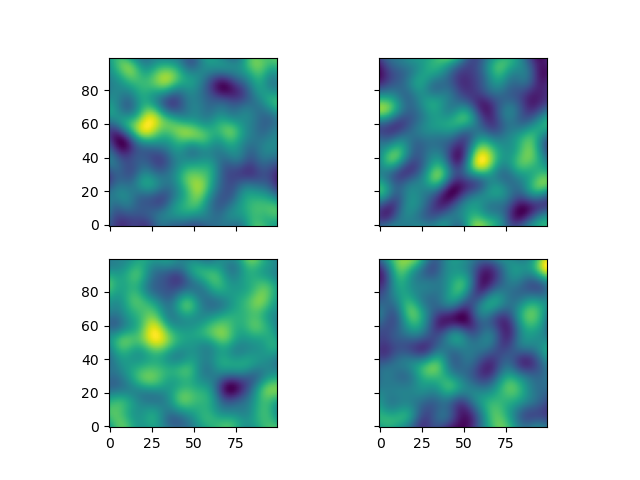

In [4]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(ens_no):
    ax[i].imshow(srf[i].T, origin="lower")
plt.show()

## Using better Seeds

It is not always a good idea to use incrementing seeds. Therefore GSTools
provides a seed generator `MasterRNG`. The loop, in which the fields are
generated would then look like



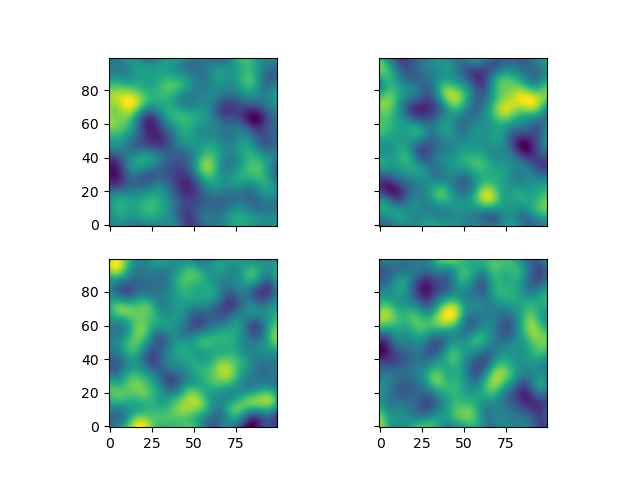

In [5]:
from gstools.random import MasterRNG

seed = MasterRNG(20220425)
for i in range(ens_no):
    srf(seed=seed(), store=f"better_field{i}")

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(ens_no):
    ax[i].imshow(srf[f"better_field{i}"].T, origin="lower")
plt.show()

In [6]:
srf.field_names

['field0',
 'field1',
 'field2',
 'field3',
 'better_field0',
 'better_field1',
 'better_field2',
 'better_field3']